# Transformation

Using Transformation we try to convert data toward **normal** distribution

## 1.1 Function Transformation

In [95]:
import numpy as np
import pandas as pd

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import scipy.stats as stats

In [99]:
titanic=pd.read_csv('../data/titanic_train.csv',usecols=(['Age','Fare','Survived']))

titanic.sample(5)

,Survived,Age,Fare
316,1,24.0,26.0000
548,0,33.0,20.5250
690,1,31.0,57.0000
532,0,17.0,7.2292
863,0,NaN,69.5500


In [100]:
titanic.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [101]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

C:\Users\shafe\AppData\Local\Temp\ipykernel_2452\2855616432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)


In [102]:
titanic.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [103]:
X=titanic.iloc[:,1:]
y=titanic.iloc[:,0]

In [104]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [105]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

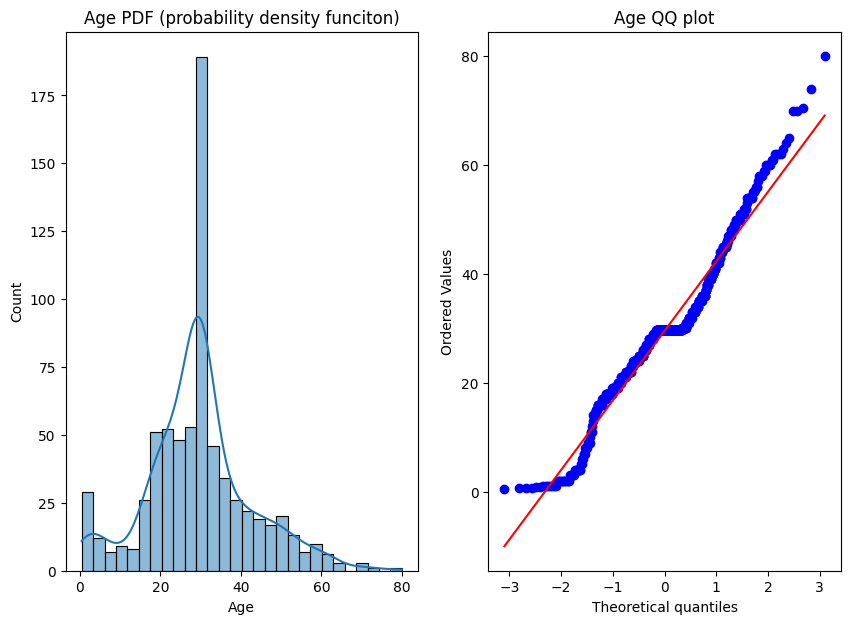

In [107]:
plt.figure(figsize=(10,7))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF (probability density funciton)')


plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')


plt.show()

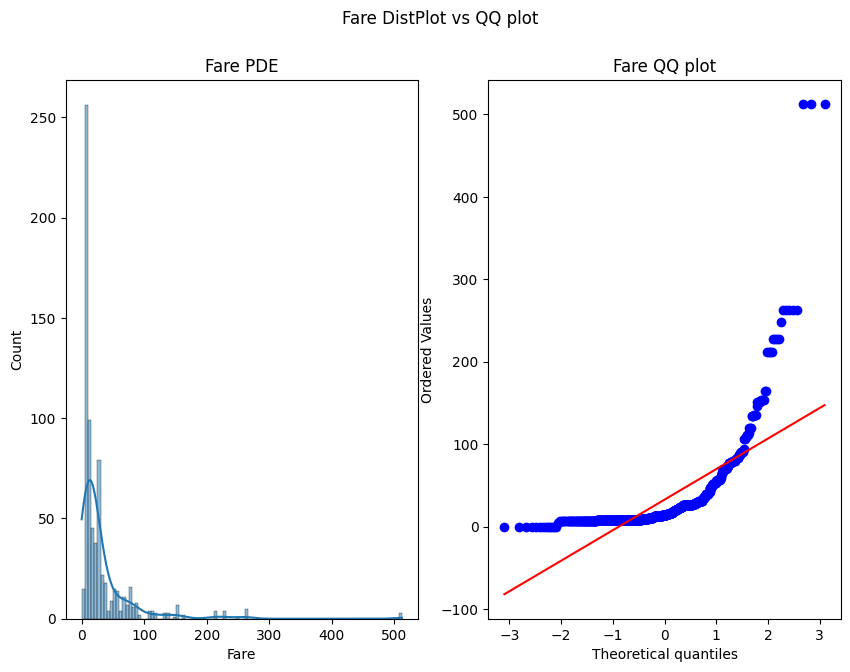

In [108]:
plt.figure(figsize=(10,7))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title("Fare PDE")

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title("Fare QQ plot")

plt.suptitle("Fare DistPlot vs QQ plot")

plt.show()

In [109]:
model_logR=LogisticRegression()
model_desT=DecisionTreeClassifier()

In [110]:
model_logR.fit(X_train,y_train)
model_desT.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
y_pred_lr=model_logR.predict(X_test)
y_pred_dt=model_desT.predict(X_test)

In [112]:
acc_lr=accuracy_score(y_test,y_pred_lr)
acc_dt=accuracy_score(y_test,y_pred_dt)
print(f"accuracy score :\n\t\t LogisticRegression : {acc_lr} \n\t\t descision Tree     : {acc_dt}")

accuracy score :
		 LogisticRegression : 0.6480446927374302 
		 descision Tree     : 0.6703910614525139


In [113]:
cross_val_score(model_logR,X_train,y_train,cv=5,scoring='accuracy')

array([0.68531469, 0.66433566, 0.66197183, 0.63380282, 0.64084507])

In [114]:
cross_val_score(model_desT,X_train,y_train,cv=5,scoring='accuracy')

array([0.58041958, 0.58741259, 0.59859155, 0.64788732, 0.6056338 ])

### Let's Do functional Transformation

In [115]:
trf1=FunctionTransformer(np.log1p)

In [116]:
X_train_transformed=trf1.fit_transform(X_train)
X_test_transformed=trf1.fit_transform(X_test)

In [117]:
X_train_transformed

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [118]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [119]:
X_transformed = trf1.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6678027465667916


In [120]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


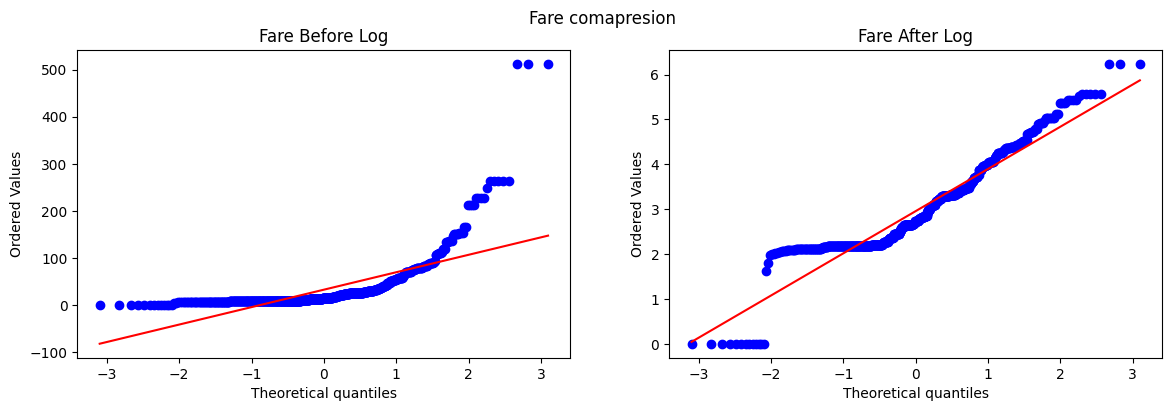

In [121]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.suptitle('Fare comapresion')
plt.show()

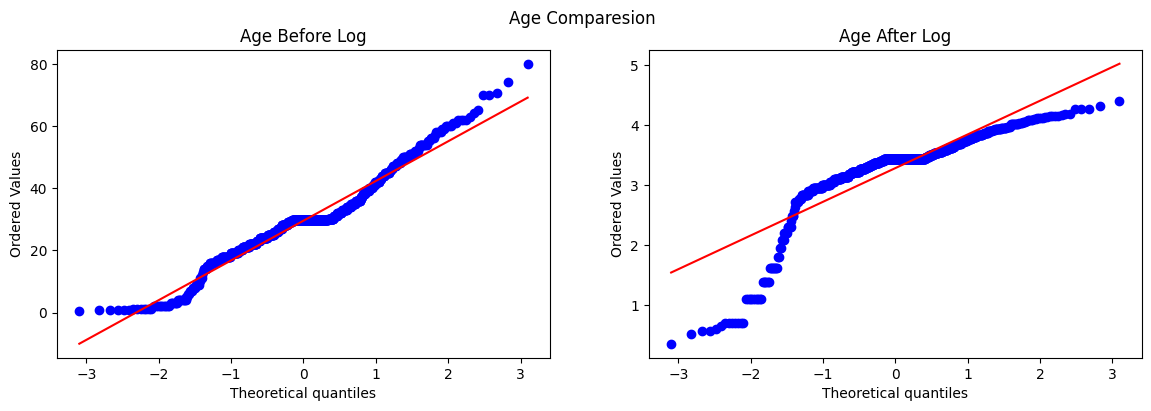

In [122]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.suptitle('Age Comparesion')
plt.show()

In [123]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [124]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('log',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Fare'])])

In [125]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [126]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

Transformed Column got priority to come first

In [127]:
X_train_transformed2[:,0]

array([3.38439026, 2.63905733, 2.18885633, 2.18089192, 3.47429294,
       5.51552654, 3.31600254, 3.3576216 , 2.18557926, 3.59731226,
       2.63905733, 3.2248579 , 2.58588257, 2.08619369, 2.35137526,
       3.29583687, 4.51085951, 5.43164561, 2.63905733, 4.06044301,
       3.47429294, 1.97927584, 2.26825241, 3.30505352, 2.35967406,
       2.1076888 , 3.15095238, 2.34978351, 4.79579055, 2.73814608,
       2.20276476, 5.35894199, 2.1102132 , 4.51085951, 2.16619247,
       3.27588734, 3.09444575, 3.4339872 , 4.13323189, 3.29583687,
       2.1102132 , 2.18557926, 2.63905733, 3.05459063, 3.44998755,
       2.08567209, 2.74084002, 2.14251023, 5.02749241, 3.29583687,
       2.18885633, 3.09104245, 5.57357887, 2.1690537 , 2.1076888 ,
       2.26825241, 2.17190677, 4.39444915, 2.38339981, 5.43164561,
       2.59151638, 0.        , 3.29583687, 2.1071783 , 2.26825241,
       2.00653477, 2.35137526, 2.20276476, 2.18557926, 2.1102132 ,
       3.44998755, 2.60083612, 3.29583687, 2.1690537 , 2.10768

In [128]:
X_train_transformed2[:,1]

array([45.5       , 23.        , 32.        , 26.        ,  6.        ,
       24.        , 45.        , 29.        , 29.69911765, 29.69911765,
       42.        , 36.        , 33.        , 17.        , 29.        ,
       50.        , 35.        , 38.        , 34.        , 17.        ,
       11.        , 61.        , 30.        ,  7.        , 63.        ,
       20.        , 29.69911765, 29.        , 36.        , 29.69911765,
       50.        , 27.        , 30.        , 33.        , 29.69911765,
       29.69911765,  2.        , 25.        , 51.        , 25.        ,
       29.69911765, 29.69911765, 24.        , 18.        , 29.69911765,
       25.        , 24.        , 22.        ,  0.92      , 24.        ,
       26.        , 34.        , 21.        , 29.69911765, 29.69911765,
       29.69911765, 22.        , 62.        , 18.        , 42.        ,
       57.        , 19.        , 42.        , 29.69911765, 20.        ,
       34.5       , 28.        , 29.69911765, 23.        , 22.  

In [129]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [130]:

X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599375780274658


In [131]:
df=pd.read_csv('../data/titanic_train.csv')

In [132]:
titanic['Compeer']=df['SibSp']+df['Parch']
df=titanic

In [133]:
df.sample(5)

,Survived,Age,Fare,Compeer
61,1,38.000000,80.0000,0
28,1,29.699118,7.8792,0
96,0,71.000000,34.6542,0
516,1,34.000000,10.5000,0
587,1,60.000000,79.2000,2


C:\Users\shafe\AppData\Local\Temp\ipykernel_2452\1970095254.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


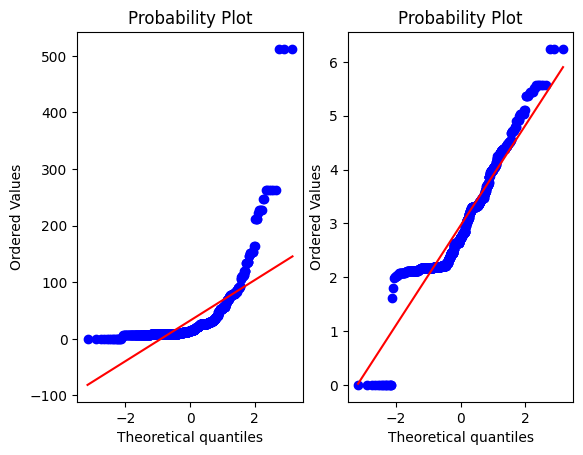

In [134]:
cols=[1]
X=df.iloc[:,1:]
y=df.iloc[:,0]
transform=np.log1p
head=X.columns
trf=ColumnTransformer([('log',FunctionTransformer(transform),cols)],
                          remainder='passthrough')

X_modified=trf.fit_transform(X)

fig,axs=plt.subplots(1,2)

stats.probplot(X.iloc[:,1],dist="norm",plot=axs[0])

stats.probplot(X_modified[:,0],dist="norm",plot=axs[1])
fig.show()

## 1.2 Power Transformation

We use concrete dataset to understand and increase skill of power transformation

In [135]:
data=pd.read_csv('../data/concrete_data.csv')

In [136]:
data.sample(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
395,200.0,200.0,0.0,190.0,0.0,1145.0,660.0,28,49.25
481,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,61.07
446,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,56,53.72
265,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,14,31.35
377,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,56,36.30
353,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,100,59.30
1001,297.8,137.2,106.9,201.3,6.0,878.4,655.3,28,53.52
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.20
991,309.9,142.8,111.2,167.8,22.1,913.9,651.2,28,38.22
358,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,100,66.95


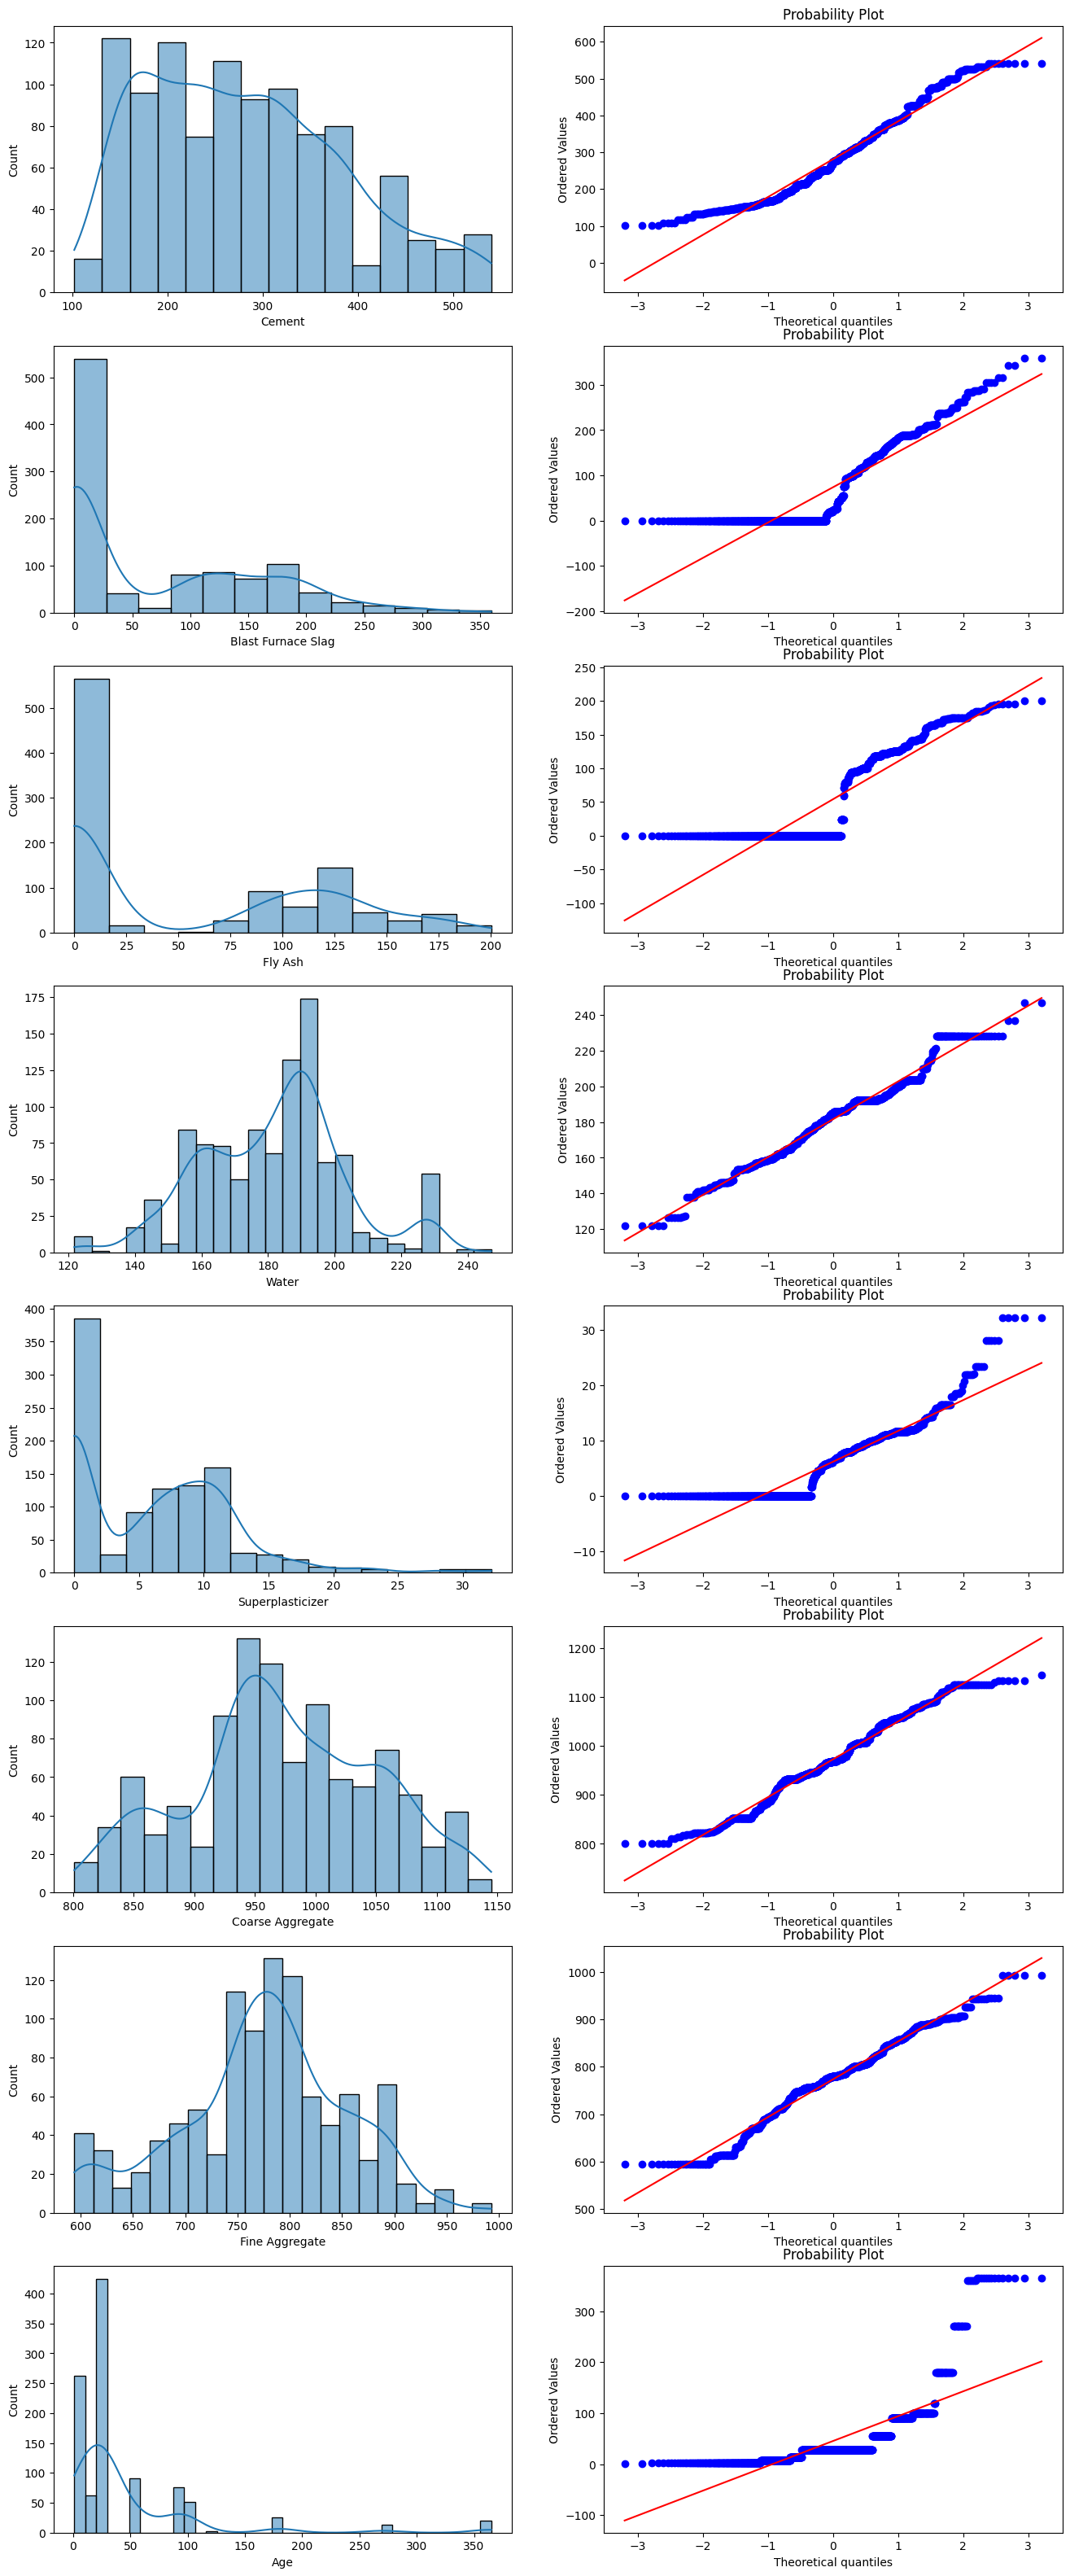

In [137]:
fig,axs=plt.subplots(nrows=8,
                     ncols=2,
                     figsize=(16,40))
for i in range(0,8):
    sns.histplot(data.iloc[:,i],kde=True,ax=axs[i,0])

    stats.probplot(data.iloc[:,i],dist="norm",plot=axs[i,1])

In [138]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [139]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [140]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(columns=['Strength']),data['Strength'],
                                               test_size=0.2,
                                               shuffle=True)

X_train.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
976,298.1,0.0,107.5,163.6,12.8,953.2,784.0,28
519,284.0,15.0,141.0,179.0,5.5,842.0,801.0,28
871,159.0,187.0,0.0,176.0,11.0,990.0,789.0,28
281,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7


### BOX COX Transfrom

In [154]:
from sklearn.preprocessing import power_transform

In [141]:
transform_X_train=power_transform(X_train+.00001,method='box-cox')
transform_X_test=power_transform(X_test+.00001,method='box-cox')

In [142]:
transform_X_train[:5,:]

array([[-0.71176571,  0.93385069, -0.92486052,  0.49303307, -1.32004176,
        -0.09398589,  0.38943951, -1.66757134],
       [-0.17560715, -1.10034849,  1.08914239, -1.79777632,  0.83928649,
         1.47455406,  0.3214803 ,  0.7023674 ],
       [-1.15389538,  0.93006469,  1.09179721, -0.26808398,  0.70510978,
         0.43203137, -0.35445449,  0.10614381],
       [ 0.22131566,  0.91802601,  1.06141412,  0.29142515,  0.75570466,
        -0.87367063, -0.95178761,  0.10614381],
       [ 0.59848747,  0.9734283 , -0.92486052,  0.62995058,  0.71280407,
        -2.05552695,  0.33555617,  0.10614381]])

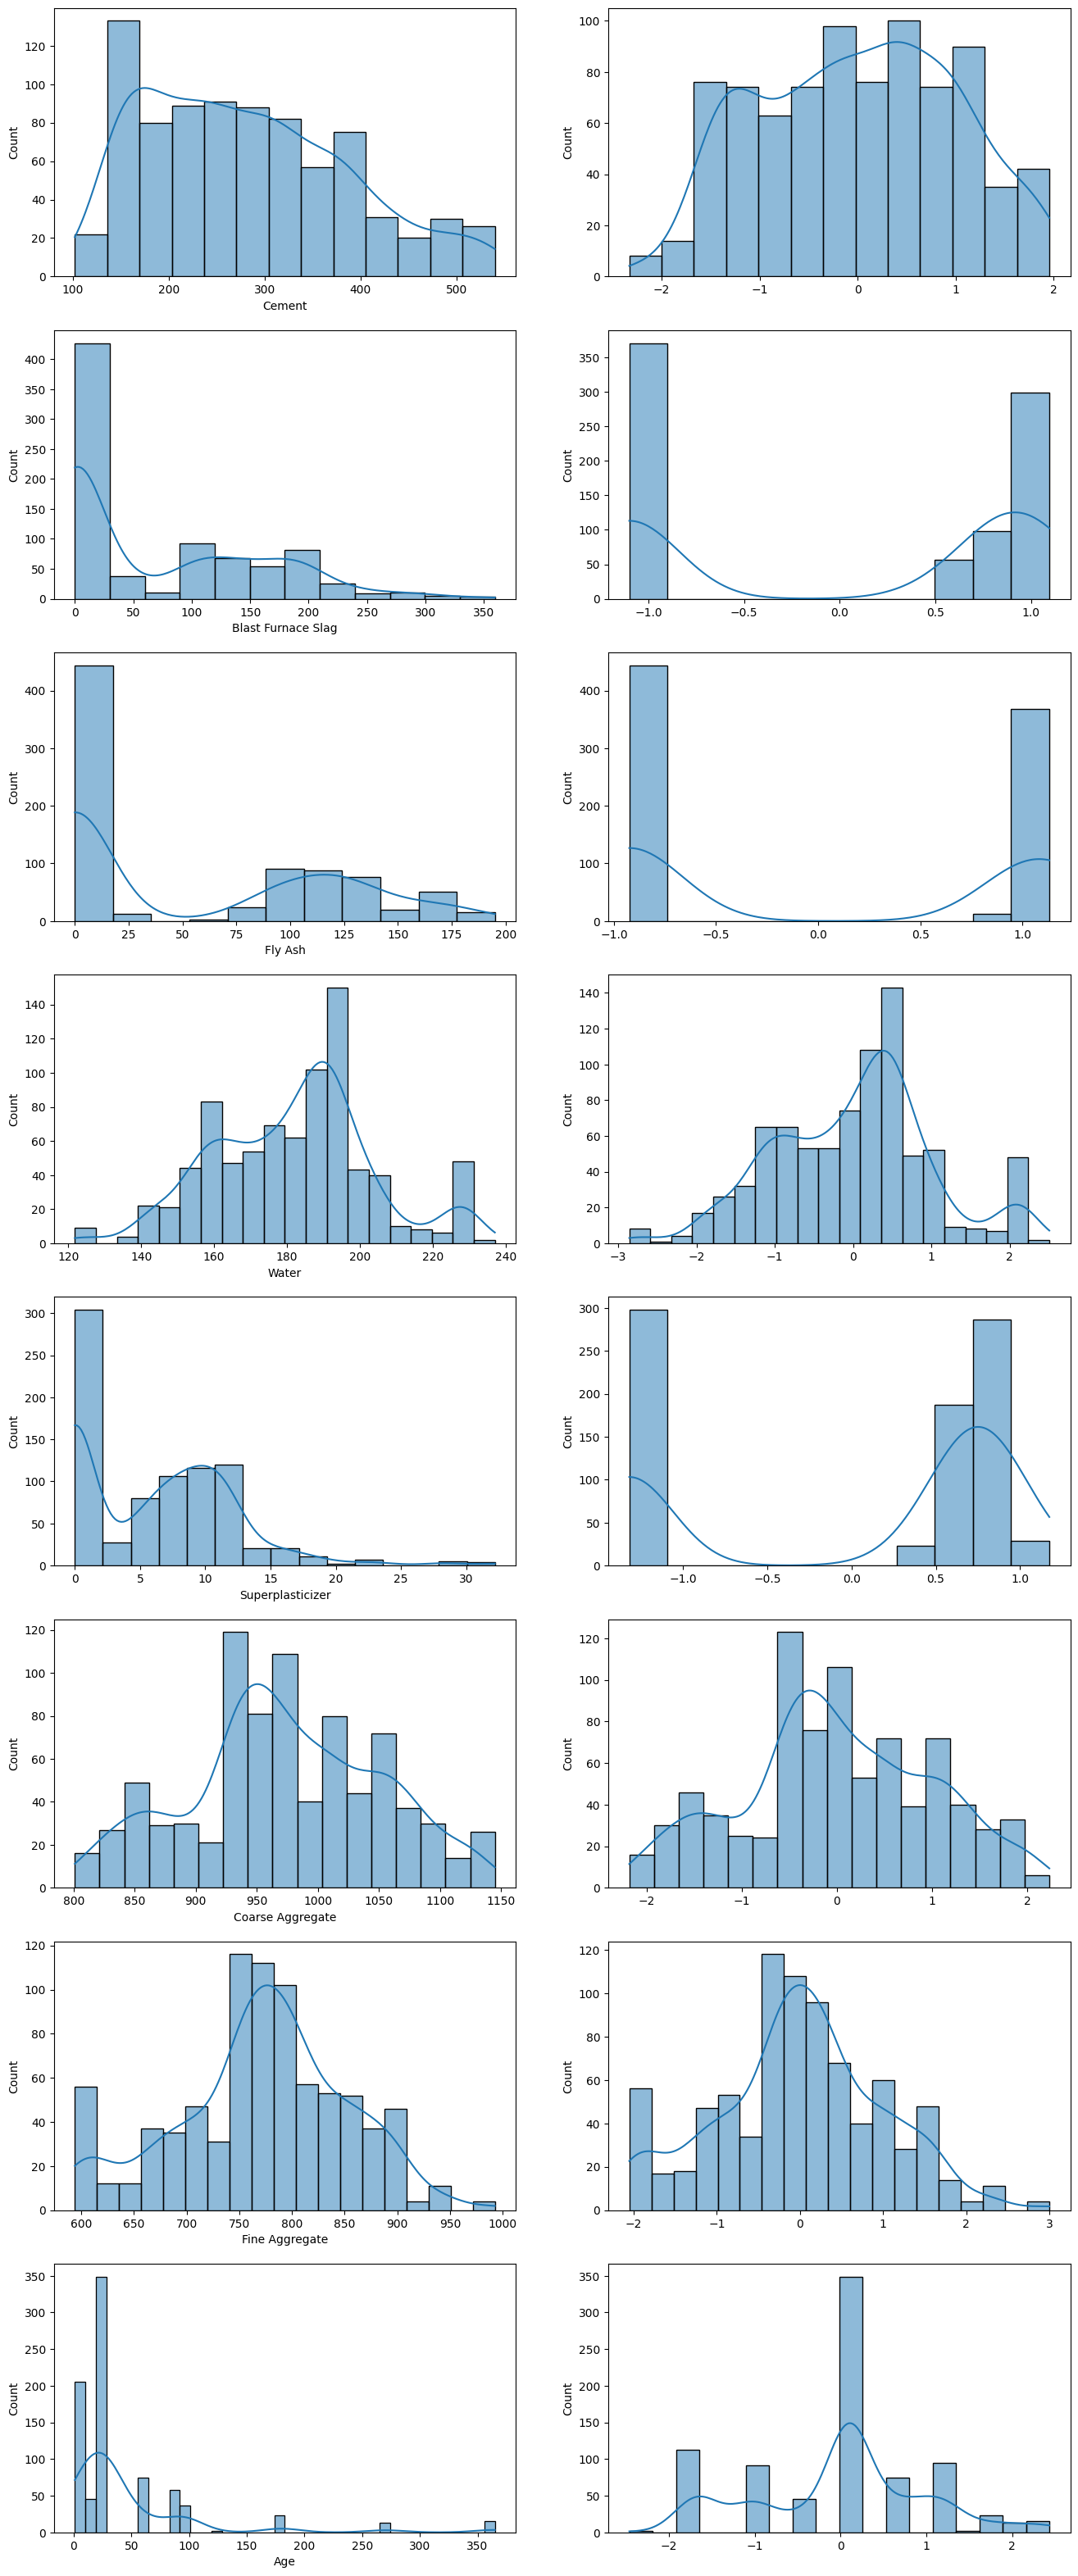

In [143]:
fig , axs=plt.subplots(8,2,figsize=(16,40))

for i in range(0,8):
    sns.histplot(X_train.iloc[:,i],kde=True,ax=axs[i,0])
    sns.histplot(transform_X_train[:,i],kde=True,ax=axs[i,1])

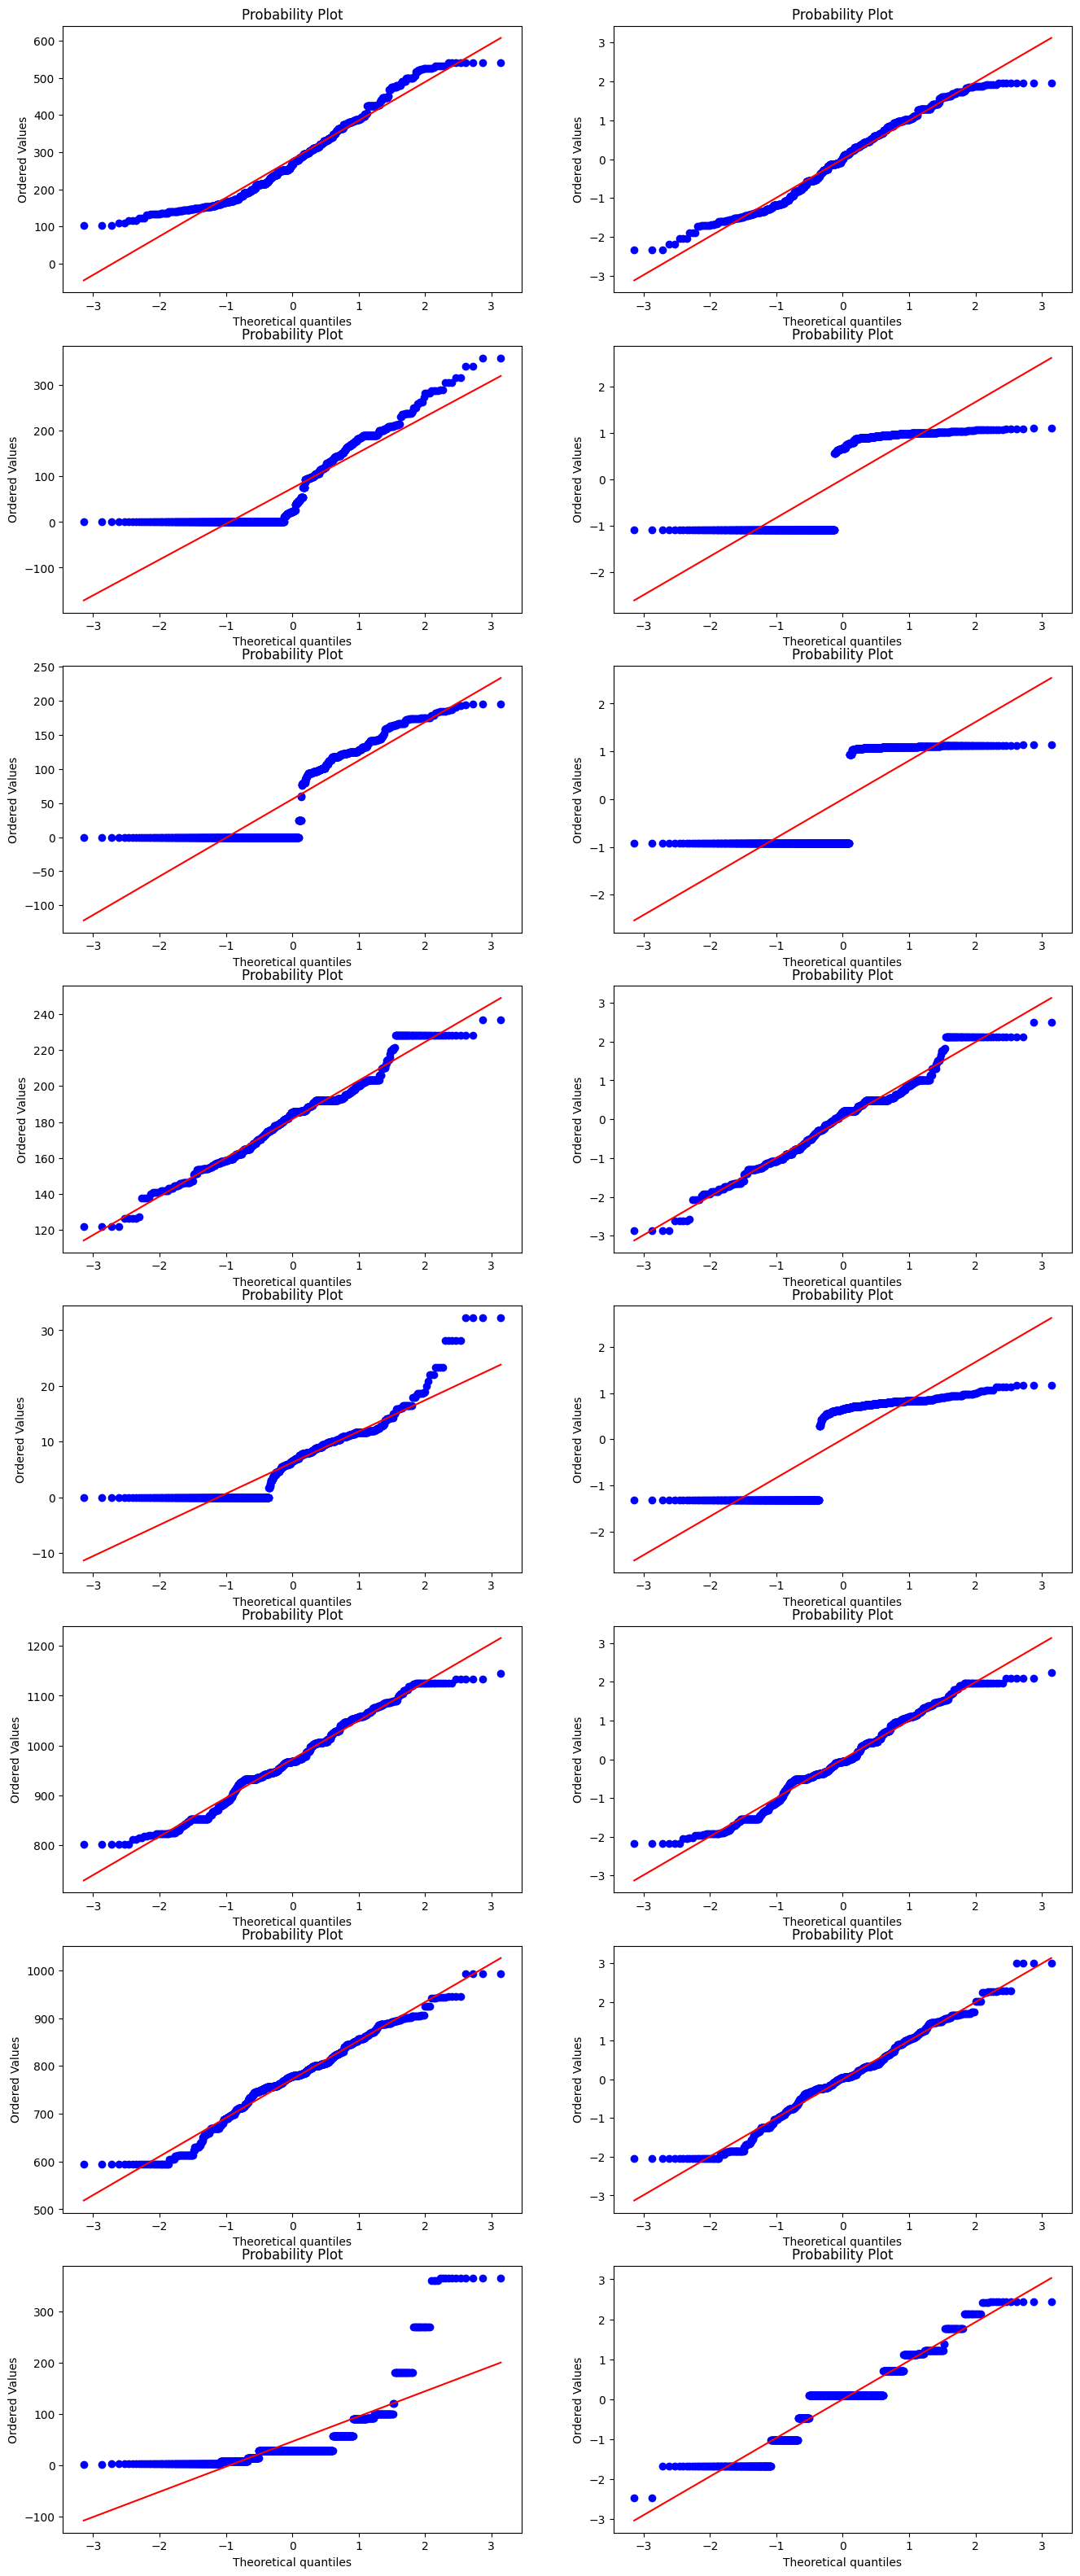

In [144]:
fig , axs=plt.subplots(8,2,figsize=(16,40))

for i in range(0,8):
    stats.probplot(X_train.iloc[:,i],dist="norm",plot=axs[i,0])

    stats.probplot(transform_X_train[:,i],dist="norm",plot=axs[i,1])

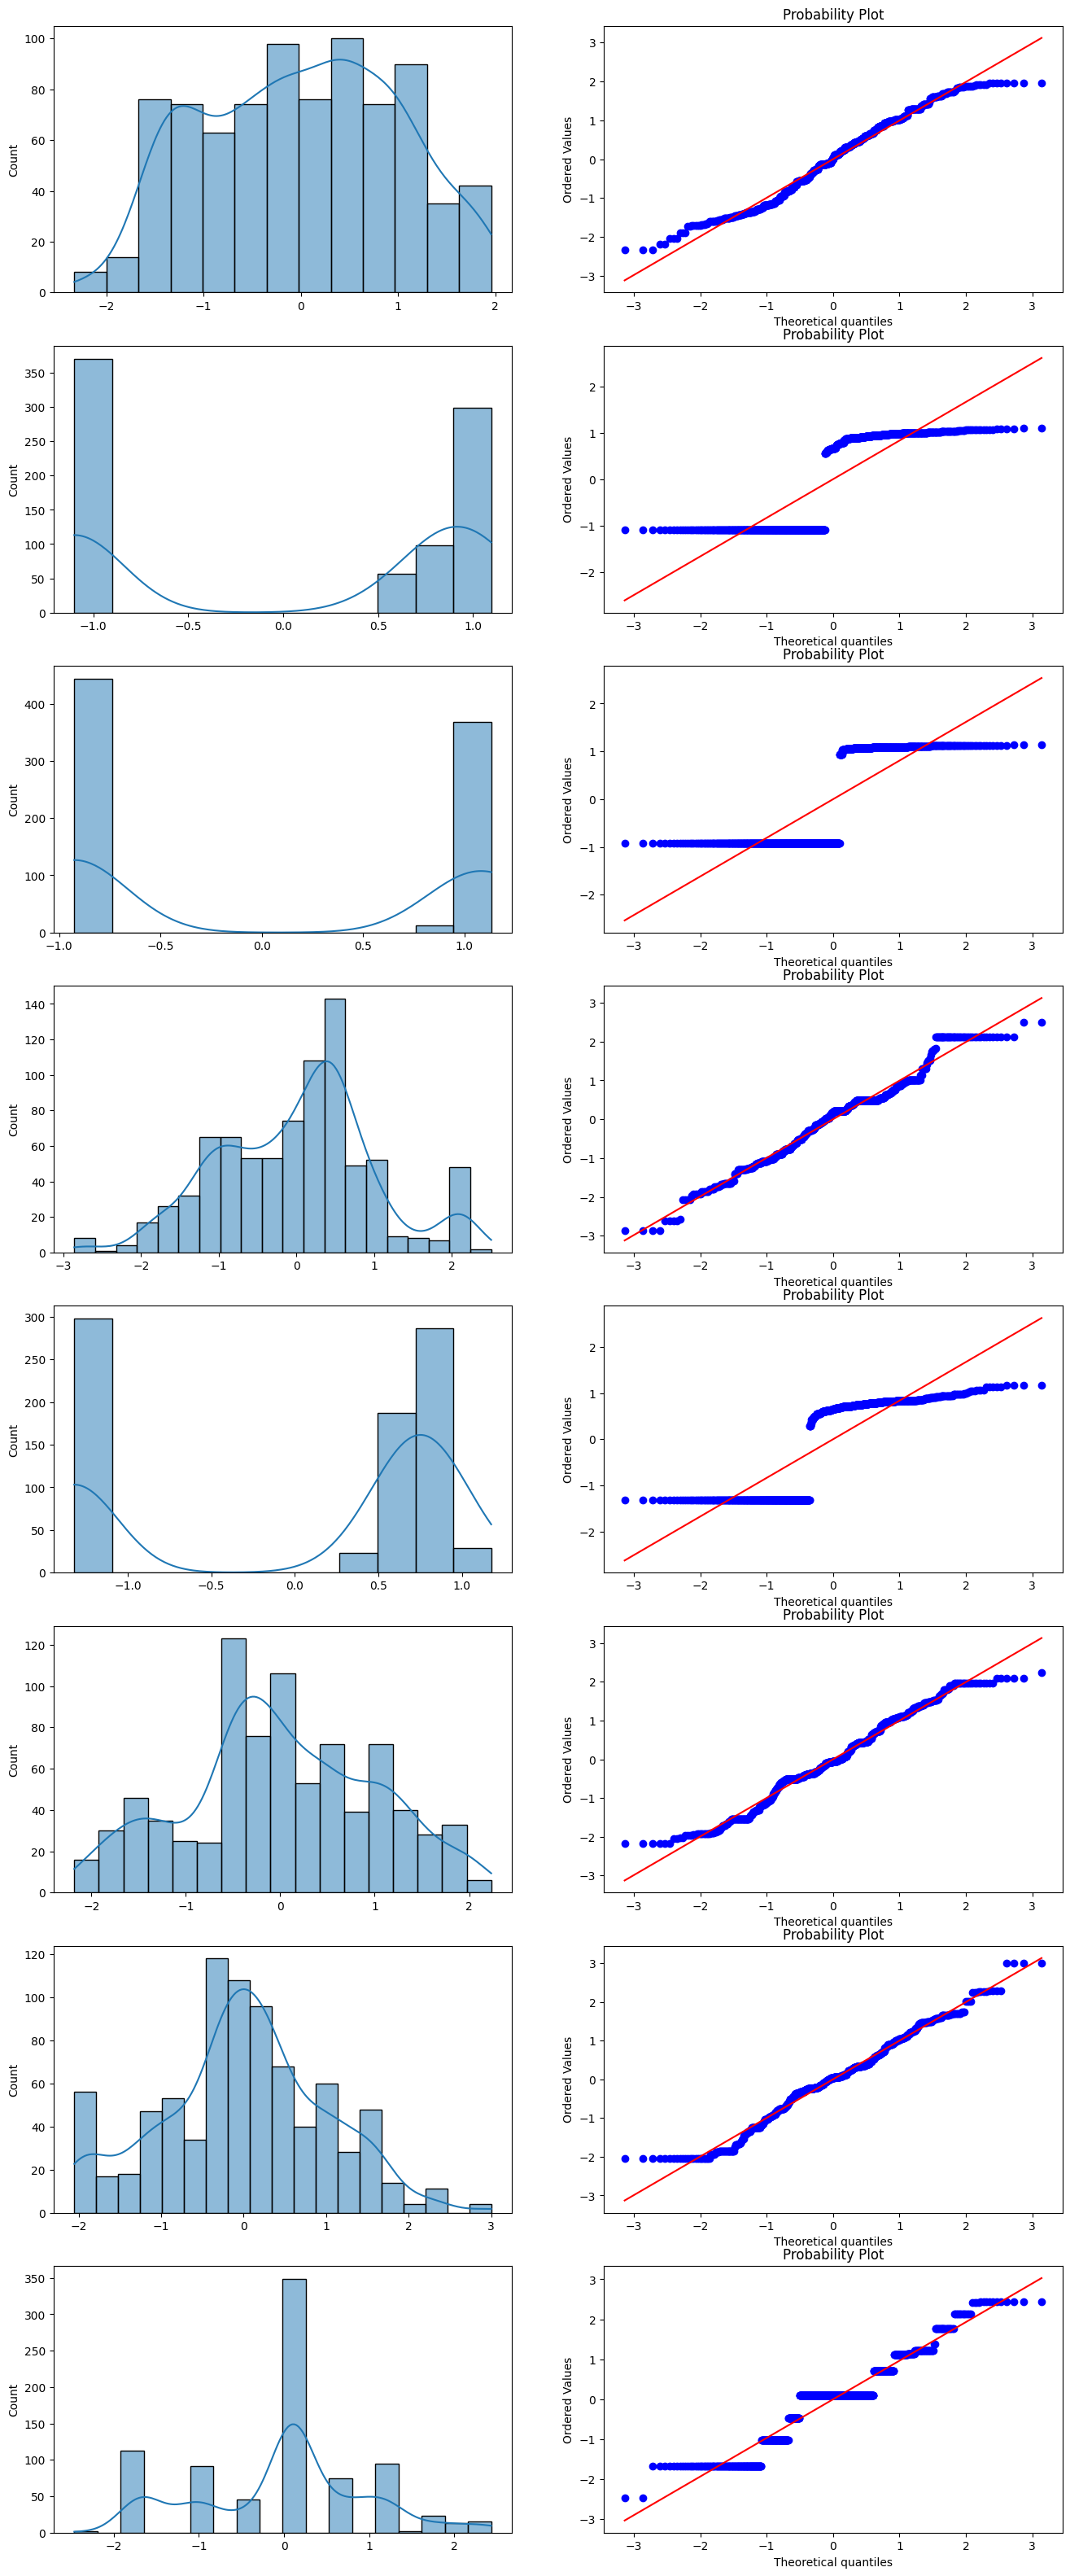

In [145]:
fig , axs=plt.subplots(8,2,figsize=(16,40))

for i in range(0,8):
    sns.histplot(transform_X_train[:,i],kde=True,ax=axs[i,0])

    stats.probplot(transform_X_train[:,i],dist="norm",plot=axs[i,1])

Let's Train ....

In [146]:
clf1=LinearRegression()
clf2=DecisionTreeClassifier()

In [147]:
clf1.fit(X_train,y_train)

LinearRegression()

In [148]:
y_pred=clf1.predict(X_test)

In [149]:
from sklearn.metrics import r2_score

In [150]:
r2_score(y_test,y_pred)

0.6465511049777637

In [151]:
cross_val_score(clf1,X_train,y_train,cv=10,scoring='r2').mean()

0.5912818129730872

In [152]:
clf1.fit(transform_X_train,y_train)
y_pred=clf1.predict(transform_X_test)
r2=r2_score(y_test,y_pred)
print(f"Got r2 score : {r2}")
print(cross_val_score(clf1,transform_X_train,y_train,cv=10,scoring='r2').mean())

Got r2 score : 0.8373035454738605
0.7851210745123688


We got improvement in R2 score after using transformation

### Yeo Johnson Transfrom

In [155]:
yj_transform=PowerTransformer(method='yeo-johnson')

In [156]:
X_train_transformed=yj_transform.fit_transform(X_train)
X_test_transformed=yj_transform.fit_transform(X_test)

In [160]:
lamdas=yj_transform.lambdas_

In [163]:
power_mapping=pd.DataFrame({
    'colums':X_train.columns,
    'lamdas_yeo_jhon' : lamdas
})

In [164]:
power_mapping

,colums,lamdas_yeo_jhon
0,Cement,0.332096
1,Blast Furnace Slag,-0.028796
2,Fly Ash,-0.245906
3,Water,0.858050
4,Superplasticizer,0.217666
5,Coarse Aggregate,1.175506
6,Fine Aggregate,1.943356
7,Age,-0.026508


In [165]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8387110631809936


,cols,Yeo_Johnson_lambdas
0,Cement,0.130425
1,Blast Furnace Slag,0.027585
2,Fly Ash,-0.110087
3,Water,0.794216
4,Superplasticizer,0.275202
5,Coarse Aggregate,1.116618
6,Fine Aggregate,1.784189
7,Age,0.007725
